Meu primeiro texto NootBook do Curso

**DROPANDO DATABASE PARA RECRIAR EM AULA**

In [ ]:
-- USE master
-- GO
-- --DROP DATABASE DW

**Criando o DATABASE  ---NAO EXECUTAR POIS NOSSA DATABASE ESTA CRIADA JA**

In [ ]:
-- -- DW Bootcamper ja criado
-- CREATE DATABASE DW

**USANDO O BANCO CRIADO**

In [ ]:
-- meu dw_42 nome do meu banco de dados 
USE DW_42

**CRIANDO SCHEMAS PARA ALOCAR TABELAS**

In [ ]:
CREATE SCHEMA BRONZE
GO
CREATE SCHEMA SILVER
GO
CREATE SCHEMA GOLD
GO

**Fase "E" Extração de dados**

**COPIANDO DADOS TABELA BASE ORIGEM "DB CRM" PARA DESTINO SCHEMA BRONZE(STAGING) NO "DB DW"**

In [3]:

--SELECT * FROM CRM.DBO.BASE
--INFORMA BANCO.SCHEMA.TABELA
--Por que o uso não do (*) asterisco não é remendado no comando SELECT
--SELECT * INTO DW.BRONZE.BASE FROM CRM.DBO.BASE

SELECT [id]
      ,[primeiro_nome]
      ,[ultimo_nome]
      ,[email]
      ,[sexo]
      ,[cidade]
      ,[pais]
      ,[codigo_pais]
      ,[Time_zone]
      ,[empresa]
      ,[profissao]
      ,[etnia]
      ,[idioma]
      ,[montadora]
      ,[carro]
      ,[ano]
      ,[nascimento]
     INTO DW_42.BRONZE.BASE --tabela que sera criada com base na tabela oriem
  FROM CRM.DBO.BASE WITH (NOLOCK) --WITH (NOLOCK) nolock apenas leitura nao utilizada 

GO

(4001 rows affected)

Total execution time: 00:00:00.257

\*\***DESNORMALIZAR A TABELA BASE EM DIMENSÕES E FATOS**  
\*\***Assunto** Vendas de Veiculos  
Realize um SELECT NA TABELA E IDENTIFIQUE DIMENSÕES E O FATO  
\--CADA LINHA É UM CLIENTE/1 Venda

In [6]:
USE DW_42;
SELECT TOP 15 * FROM BRONZE.BASE

(15 rows affected)

Total execution time: 00:00:01

id,primeiro_nome,ultimo_nome,email,sexo,cidade,pais,codigo_pais,Time_zone,empresa,profissao,etnia,idioma,montadora,carro,ano,nascimento
1,Channa,Kelway,ckelway0@cocolog-nifty.com,Female,Casimiro de Abreu,Brazil,BR,America/Sao_Paulo,Twitternation,Cost Accountant,Nicaraguan,Assamese,Toyota,Sienna,2009,1971-08-07
2,Conny,Tilliards,ctilliards1@forbes.com,Female,São Marcos,Brazil,BR,America/Sao_Paulo,JumpXS,Nuclear Power Engineer,White,Albanian,Jeep,Commander,2007,2004-07-07
3,Blondie,Boulstridge,bboulstridge2@webeden.co.uk,Female,Orlando,United States,US,America/New_York,Avavee,Environmental Tech,Ecuadorian,Estonian,Oldsmobile,Cutlass Cruiser,1993,2008-12-31
4,Ewen,Fulton,efulton3@go.com,Male,Jackson,United States,US,America/Chicago,Meejo,Payment Adjustment Coordinator,Asian,Finnish,Dodge,Intrepid,1999,1960-03-15
5,Jasun,Heathorn,jheathorn4@wikia.com,Male,Matozinhos,Brazil,BR,America/Sao_Paulo,Thoughtbeat,Director of Sales,Eskimo,West Frisian,Mercedes-Benz,600SL,1993,1984-09-14
6,Robinetta,Martinho,rmartinho5@aboutads.info,Female,Fonte Boa,Brazil,BR,America/Manaus,Bluezoom,Biostatistician III,Alaska Native,German,Lexus,GS,2002,1987-06-14
7,Lemuel,Coldtart,lcoldtart6@xrea.com,Male,Braço do Norte,Brazil,BR,America/Sao_Paulo,Zazio,Legal Assistant,Blackfeet,Yiddish,Mercedes-Benz,SLK-Class,1998,1961-02-23
8,Modestine,Huton,mhuton7@gov.uk,Female,Miami,United States,US,America/New_York,Flashdog,Editor,Creek,Gagauz,Mazda,Protege,1995,1974-09-02
9,Lynea,Clingan,lclingan8@google.nl,Female,Louisville,United States,US,America/Kentucky/Louisville,Jaxspan,VP Marketing,Tongan,Swahili,Audi,90,1988,1980-05-10
10,Nowell,Schild,nschild9@alibaba.com,Male,West Palm Beach,United States,US,America/New_York,Kwinu,VP Product Management,Houma,Guaraní,Lincoln,Continental,1998,1987-10-18


**Dimensões identificadas**  

- D\_Geografia (Cidade, Pais, Codigo\_pais,Time\_zone)
    
- D\_Profissao (Profissao)
    
- D\_Idiomas (idioma)
    
- D\_etnia(etnia)
    
- D\_Montadora(Montadora)
    
- D\_Carro(carro)
    
- D\_Cliente (id\_cliente,Primeiro\_nome, Ultimo\_nome,email, sexo, id\_geografia,empresa,id\_profissao, id\_idioma, id\_etnia, nascimento
    

**Fato identificadas**

- F\_Vendas (sk\_transacao,id\_cliente,id\_carro,ano)

**<mark>Cria a tabelas fatos e dimensões fisicamente no DW</mark>**

**Criar Dimensão D\_Geografia**   

- D\_Geografia (Cidade, Pais, Codigo\_pais,Time\_zone)

In [7]:
USE DW_42;
CREATE TABLE SILVER.D_Geografia(
	SK_geografia int IDENTITY(1,1) PRIMARY KEY ,
	cidade varchar(50) NULL,
	pais varchar(50) NULL,
	codigo_pais varchar(2) NULL,
	Time_zone varchar(50) NULL
);

Commands completed successfully.

Total execution time: 00:00:00.228

**Criar Dimensão D\_Profissao**

- D\_Profissao (Profissao)

In [8]:
USE DW_42;
CREATE TABLE SILVER.D_Profissao(
	SK_profissao [int] IDENTITY(1,1) PRIMARY KEY ,
	nome_profissao varchar(50) NULL
);

Commands completed successfully.

Total execution time: 00:00:00.215

**Criar Dimensão D\_idioma**  

- D\_Idiomas (idioma)

In [9]:
USE DW_42;
CREATE TABLE SILVER.D_idiomas(
	SK_idioma int IDENTITY(1,1) PRIMARY KEY ,
	idioma varchar(50) NULL
);

Commands completed successfully.

Total execution time: 00:00:00.256

**Criar Dimensão D\_etnia**  

- D\_etnia(etnia)

In [10]:
USE DW_42;
CREATE TABLE SILVER.D_etnia(
	SK_etnia int IDENTITY(1,1) PRIMARY KEY ,
	etnia varchar(50) NULL
);

Commands completed successfully.

Total execution time: 00:00:00.209

**Criar Dimensão D\_montadora**  

- D\_Montadora(Montadora)

In [11]:
USE DW_42;
CREATE TABLE SILVER.D_montadora(
	SK_montadora [int] IDENTITY(1,1) PRIMARY KEY ,
	nome_montadora [varchar](50) NULL
);

Commands completed successfully.

Total execution time: 00:00:00.213

**Criar Dimensão D\_carro**

- D\_Carro(carro)

In [12]:
USE DW_42;
CREATE TABLE SILVER.D_carro(
	SK_montadora int NOT NULL,
	SK_carro int IDENTITY(1,1) PRIMARY KEY,
	nome_carro varchar(50) NULL
    );

Commands completed successfully.

Total execution time: 00:00:00.209

**Criar Dimensão D\_cliente**

- D\_Cliente (id\_cliente,Primeiro\_nome, Ultimo\_nome,email, sexo, id\_geografia,empresa,id\_profissao,id\_idioma,id\_etnia,nascimento

In [13]:
USE DW_42;
CREATE TABLE SILVER.D_cliente(
	SK_cliente int IDENTITY(1,1) PRIMARY KEY,
	id_cliente int NOT NULL,
	primeiro_nome varchar(50) NOT NULL,
	ultimo_nome varchar(50) NOT NULL,
	email varchar(50) NOT NULL,
	sexo varchar(50) NOT NULL,
	SK_geografia INT NOT NULL,
	empresa varchar(50) NOT NULL,
    SK_profissao int NOT NULL,
    SK_idioma int NOT NULL, 
    SK_etnia int NOT NULL, 
	nascimento date NOT NULL
);


Commands completed successfully.

Total execution time: 00:00:00.211

**Cria Fato Vendas**

- F\_Vendas (sk\_transacao,id\_cliente,id\_carro,ano)

In [14]:
USE DW_42;
CREATE TABLE GOLD.F_VENDAS(
    SK_VENDA INT IDENTITY(1,1) NOT NULL,
	SK_cliente [int] NOT NULL,
	SK_carro [int] NOT NULL,
	ano [int] NOT NULL
);

Commands completed successfully.

Total execution time: 00:00:00.207

**Diagrama Criado**

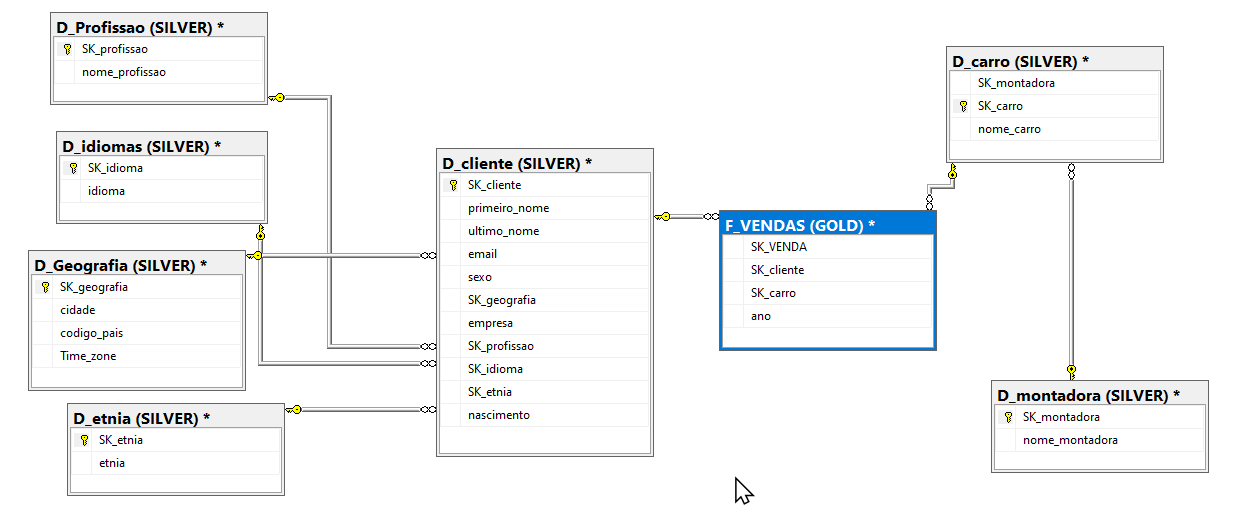

**Fase Transformar e carregar dados (TL)**

**CARGA DIMENSÃO GEOGRÁFIA**

In [15]:
USE DW_42;
--LIMPA TABELA usnado o TRUNCATE que é mais performartico, ele zera o Pirmary key
TRUNCATE TABLE SILVER.D_Geografia; 
--CARREGA DADOS o DISTINCT evita informações duplicadas 
INSERT INTO SILVER.D_Geografia (cidade,pais,codigo_pais,Time_zone)
SELECT DISTINCT cidade,pais,codigo_pais,Time_zone FROM BRONZE.BASE

(1427 rows affected)

Total execution time: 00:00:00.301

**Analisar Carga D\_Geografia**

In [16]:
SELECT * FROM SILVER.D_Geografia

(1427 rows affected)

Total execution time: 00:00:00.624

SK_geografia,cidade,pais,codigo_pais,Time_zone
1,Abaeté,Brazil,BR,America/Sao_Paulo
2,Abaetetuba,Brazil,BR,America/Santarem
3,Acaraú,Brazil,BR,America/Fortaleza
4,Acopiara,Brazil,BR,America/Fortaleza
5,Açu,Brazil,BR,America/Fortaleza
6,Açucena,Brazil,BR,America/Sao_Paulo
7,Adamantina,Brazil,BR,America/Sao_Paulo
8,Afogados da Ingazeira,Brazil,BR,America/Recife
9,Água Preta,Brazil,BR,America/Recife
10,Aguaí,Brazil,BR,America/Sao_Paulo


**CARGA DIMENSÃO PROFISSÃO**

In [17]:
USE [DW_42];
--LIMPA TABELA
TRUNCATE TABLE SILVER.D_Profissao;
--CARREGA DADOS
INSERT INTO SILVER.D_Profissao (nome_profissao)
SELECT distinct Profissao FROM BRONZE.BASE
GO

(195 rows affected)

Total execution time: 00:00:00.237

In [ ]:
--Exemplo de zera identity em caso de delete
DBCC CHECKIDENT ('SILVER.D_Profissao', RESEED, 0);
GO

**Analisa Carga D\_Profissao**

In [18]:
SELECT * FROM SILVER.D_Profissao

(195 rows affected)

Total execution time: 00:00:00.211

SK_profissao,nome_profissao
1,Administrative Assistant I
2,Quality Engineer
3,Junior Executive
4,Programmer IV
5,Data Coordiator
6,Research Assistant II
7,Health Coach IV
8,Financial Analyst
9,Web Developer IV
10,Senior Developer


**CARGA DIMENSÃO IDIOMAS**

In [19]:
USE [DW_42]
GO
--LIMPA TABELA
TRUNCATE TABLE SILVER.D_idiomas
GO
--CARREGA DADOS
INSERT INTO SILVER.D_idiomas (idioma)
SELECT DISTINCT IDIOMA FROM BRONZE.BASE
GO

Commands completed successfully.

Commands completed successfully.

(97 rows affected)

Total execution time: 00:00:00.634

**Analisa CARGA da Idiomas**

In [22]:
USE DW_42
GO
SELECT * FROM SILVER.D_idiomas

Commands completed successfully.

(97 rows affected)

Total execution time: 00:00:00.419

SK_idioma,idioma
1,English
2,Zulu
3,Dhivehi
4,Punjabi
5,Gujarati
6,Dzongkha
7,Ndebele
8,Lithuanian
9,Irish Gaelic
10,New Zealand Sign Language


**CARGA DIMENSÃO ETNIA**

In [23]:
USE [DW_42]
GO
--LIMPA TABELA
TRUNCATE TABLE SILVER.D_etnia
GO
--CARREGA DADOS
INSERT INTO SILVER.D_etnia  (etnia)
SELECT DISTINCT etnia FROM BRONZE.BASE
GO



Commands completed successfully.

Commands completed successfully.

(93 rows affected)

Total execution time: 00:00:00.640

**Analise de Carga de Etnia**

In [29]:
use DW_42
GO
SELECT * FROM SILVER.D_etnia

Commands completed successfully.

(93 rows affected)

Total execution time: 00:00:03.048

SK_etnia,etnia
1,Houma
2,Cheyenne
3,Chippewa
4,Apache
5,Alaska Native
6,Latin American Indian
7,Alaskan Athabascan
8,Ecuadorian
9,Chilean
10,Yaqui


**CARGA DIMENSÃO MONTADORA**

In [25]:
USE [DW_42]
GO
--LIMPA TABELA
TRUNCATE TABLE SILVER.D_montadora
GO
--CARREGA DADOS
INSERT INTO SILVER.D_montadora  (nome_montadora)
SELECT DISTINCT montadora FROM BRONZE.BASE
GO

Commands completed successfully.

Commands completed successfully.

(73 rows affected)

Total execution time: 00:00:00.633

**Analisa Carga Montadora**

In [28]:
SELECT * from SILVER.D_montadora


Query was canceled by user

Total execution time: 00:00:15.099

Total execution time: 00:00:15.099

**CARGA DIMENSÃO CARRO**

In [27]:
USE DW_42 
GO

SELECT DISTINCT A.CARRO, B.SK_montadora 
FROM BRONZE.BASE A
INNER JOIN SILVER.D_montadora B
ON A.montadora=B.nome_montadora

Commands completed successfully.

: Msg 468, Level 16, State 9, Line 7
Cannot resolve the collation conflict between "SQL_Latin1_General_CP1_CI_AS" and "Latin1_General_CI_AS" in the equal to operation.

Total execution time: 00:00:00.421

**CORRIGINDO O CONFLITO DE COLLATION**

In [ ]:
--DESCOBRINDO  O COLLATION DAS TABELAS

In [30]:
-- Verificando as collations da tabela
SELECT TABLE_NAME, COLUMN_NAME, COLLATION_NAME
FROM INFORMATION_SCHEMA.COLUMNS
WHERE TABLE_NAME IN  ('BASE','D_montadora')

(19 rows affected)

Total execution time: 00:00:00.477

TABLE_NAME,COLUMN_NAME,COLLATION_NAME
BASE,id,NULL
BASE,primeiro_nome,Latin1_General_CI_AS
BASE,ultimo_nome,Latin1_General_CI_AS
BASE,email,Latin1_General_CI_AS
BASE,sexo,Latin1_General_CI_AS
BASE,cidade,Latin1_General_CI_AS
BASE,pais,Latin1_General_CI_AS
BASE,codigo_pais,Latin1_General_CI_AS
BASE,Time_zone,Latin1_General_CI_AS
BASE,empresa,Latin1_General_CI_AS


**Ajustando o JOIN com COLLATE**

In [31]:
USE DW_42
GO

SELECT DISTINCT A.CARRO, B.SK_montadora 
FROM BRONZE.BASE A
INNER JOIN SILVER.D_montadora B
ON A.montadora COLLATE Latin1_General_CI_AS=B.nome_montadora 

Commands completed successfully.

(874 rows affected)

Total execution time: 00:00:01.945

CARRO,SK_montadora
1 Series,32
100,72
1000,15
1500,23
1500,39
1500,71
1500 Club Coupe,23
164,69
200,61
200,72


**CARGA DIMENSÃO CARRO**

In [32]:
USE DW_42;
--LIMPA TABELA
TRUNCATE TABLE SILVER.D_carro;
--CARREGA DADOS
INSERT INTO SILVER.D_carro
           (SK_montadora
           ,nome_carro)
SELECT DISTINCT B.SK_montadora, A.CARRO
FROM BRONZE.BASE A
INNER JOIN SILVER.D_montadora B
ON A.montadora COLLATE Latin1_General_CI_AS=B.nome_montadora  
GO          

(874 rows affected)

Total execution time: 00:00:00.231

**Analisando Carga Dimensão Carro**

In [33]:
SELECT * FROM SILVER.D_carro

(874 rows affected)

Total execution time: 00:00:01.221

SK_montadora,SK_carro,nome_carro
1,1,Allante
1,2,Catera
1,3,CTS
1,4,CTS-V
1,5,DeVille
1,6,DTS
1,7,Eldorado
1,8,Escalade
1,9,Escalade ESV
1,10,Escalade EXT


**CARGA DIMENSÃO CLIENTE**

In [ ]:
USE DW_42;

--LIMPA TABELA
TRUNCATE TABLE SILVER.D_cliente;
--CARREGA DADOS
INSERT INTO SILVER.D_cliente
           (id_cliente,primeiro_nome,ultimo_nome,email,sexo,SK_geografia,empresa,SK_profissao,SK_idioma,SK_etnia,nascimento)
  SELECT 
    A.id, a.Primeiro_nome, A.Ultimo_nome,A.email,A.sexo ,B.SK_geografia,A.empresa,C.SK_profissao,D.SK_idioma,E.SK_etnia,a.nascimento
--HASHBYTES('SHA2_256',CONCAT(A.cidade,A.pais,A.codigo_pais,A.time_zone))
FROM BRONZE.BASE A
INNER JOIN SILVER.D_Geografia B
ON HASHBYTES('SHA2_256',CONCAT(A.cidade,A.pais,A.codigo_pais,A.time_zone))=
   HASHBYTES('SHA2_256',CONCAT(B.cidade,B.pais,B.codigo_pais,B.time_zone))
INNER JOIN SILVER.D_Profissao C
ON A.profissao COLLATE Latin1_General_CI_AS=C.nome_profissao
INNER JOIN SILVER.D_idiomas D
ON A.idioma COLLATE Latin1_General_CI_AS =D.idioma
INNER JOIN SILVER.D_etnia E
ON A.etnia COLLATE Latin1_General_CI_AS =E.etnia
GO





**Verificando Carga Dimensão Cliente**

In [ ]:
SELECT * FROM SILVER.D_cliente

**CARGA FATO VENDAS**

In [ ]:
USE DW
GO
--LIMPA TABELA
--TRUNCATE TABLE GOLD.F_VENDAS
--CARREGA DADOS
SELECT b.SK_cliente
--,c.SK_carro,a.ano
FROM BRONZE.BASE A
INNER JOIN SILVER.D_CLIENTE B
ON A.id=b.id_cliente
INNER JOIN SILVER.D_carro C
on A.carro COLLATE Latin1_General_CI_AS=c.nome_carro


**Encontrando o problema de duplicar registros de vendas**

In [ ]:
--select carro from bronze.base a
--select distinct carro from bronze.base a --843 reg
--select * from silver.d_carro a --874 reg
select A.nome_carro, count(*) qtd from Silver.d_carro A group by A.nome_carro order by 2 desc 

**Ajustando a JOIN para Carga Fato**

In [ ]:
USE DW
GO
--LIMPA TABELA
TRUNCATE TABLE GOLD.F_VENDAS
--CARREGA DADOS
INSERT INTO GOLD.F_VENDAS (SK_cliente,SK_carro,ano)
SELECT b.SK_cliente,c.SK_carro,a.ano
FROM BRONZE.BASE A
INNER JOIN SILVER.D_CLIENTE B
ON A.id=b.id_cliente
INNER JOIN SILVER.D_carro C
on A.carro COLLATE Latin1_General_CI_AS=c.nome_carro
INNER JOIN SILVER.D_montadora D
on A.montadora COLLATE Latin1_General_CI_AS=D.nome_montadora
AND C.SK_montadora=D.SK_montadora